# **Text Classification**

---






Load and read in dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_pickle('consumer_complaint_dataset.data', compression='gzip')

In [2]:
df.head()

,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...


In [3]:
df.shape

(492255, 2)

In [4]:
## Reduce the dataset size
df = df.sample(frac=0.1, random_state=10)

## Distribution

In [5]:
pd.crosstab(df.topic, columns="Count").sort_values(by='Count', ascending=False)

col_0,Count
topic,
"Credit reporting, credit repair services, or other personal consumer reports",14544
Debt collection,10683
Mortgage,6154
Credit card or prepaid card,3199
Credit reporting,3134
Student loan,2441
Credit card,1950
Checking or savings account,1872
Bank account or service,1534


## Group Labels

In [6]:
df.loc[df['topic']=='Credit reporting', 'topic'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['topic']=='Credit card', 'topic'] = 'Credit card or prepaid card'
df.loc[df['topic']=='Prepaid card', 'topic'] = 'Credit card or prepaid card'
df.loc[df['topic']=='Payday load', 'topic'] = 'Payday loan, title loan, or personal loan'
df.loc[df['topic']=='Virtual currency', 'topic'] = 'Money transfer, virtual currency, or money service'
df.loc[df['topic']=='Money transfers', 'topic'] = 'Money transfer, virtual currency, or money service'
df = df[df['topic'] != 'Other financial service']

## Labels after grouping

In [7]:
pd.crosstab(df.topic, columns="Count").sort_values(by='Count', ascending=False)

col_0,Count
topic,
"Credit reporting, credit repair services, or other personal consumer reports",17678
Debt collection,10683
Mortgage,6154
Credit card or prepaid card,5275
Student loan,2441
Checking or savings account,1872
Bank account or service,1534
Consumer Loan,936
"Money transfer, virtual currency, or money service",897


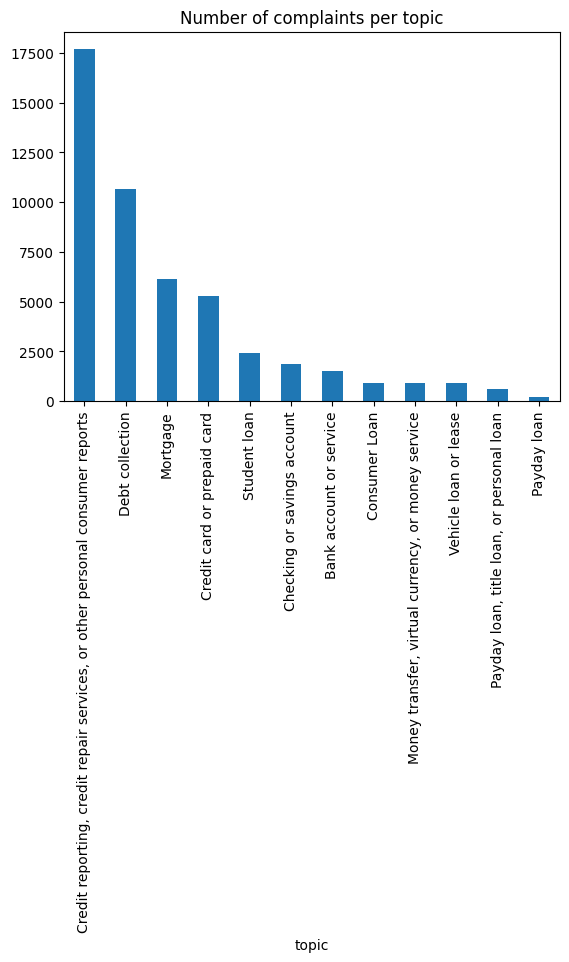

In [8]:
df['topic'].value_counts().sort_values(ascending=False).plot(kind='bar',title='Number of complaints per topic')
plt.show()

## Function to retrieve text

In [9]:
def print_plot(index):
    print("Available indices:", df.index.tolist())
    if index in df.index:
        example = df[df.index == index][['input', 'topic']].values
        if len(example) > 0:
            print(example[0][0])
            print('Topic: ', example[0][1])
        else:
            print(f"No data found at index {index}")
    else:
        print(f"Index {index} is out of bounds")

print_plot(279054)

Available indices: [279054, 196280, 436166, 206712, 51514, 192587, 483068, 207893, 373199, 393414, 449261, 415941, 290833, 410543, 21923, 84209, 303641, 170324, 311389, 138603, 320042, 196928, 293380, 16400, 209417, 414905, 301723, 485934, 297617, 405447, 130342, 44528, 6507, 310393, 294945, 433146, 171071, 23485, 331727, 491047, 394355, 375428, 130418, 348309, 375126, 310611, 142311, 463537, 315262, 388708, 61377, 362503, 251425, 170715, 221925, 311767, 314030, 362994, 67954, 340844, 454852, 77597, 151207, 421445, 448198, 326699, 295154, 74476, 124594, 13595, 210450, 1606, 435815, 359172, 50628, 312003, 81211, 275839, 385575, 52945, 57403, 373968, 377737, 416345, 352748, 225748, 12517, 175912, 58061, 168922, 370193, 189703, 474523, 52849, 87628, 31425, 473540, 334898, 169858, 312504, 207637, 160161, 168801, 105965, 19746, 266258, 485320, 227832, 3279, 55548, 29036, 307904, 453721, 9462, 238418, 362073, 295287, 2049, 286854, 286620, 244591, 45339, 219956, 149019, 347014, 482940, 263381

## Clean Data

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sawit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
import re

REPLACE_BY_SPLACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:3: SyntaxWarning: invalid escape sequence '\['
C:\Users\Sawit\AppData\Local\Temp\ipykernel_23156\3808894635.py:3: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPLACE_RE = re.compile('[/(){}\[\]\|@,;]')


## Function to clean text

In [13]:
def clean_text(text):
  text = text.lower()
  text = REPLACE_BY_SPLACE_RE.sub(' ', text)
  text = BAD_SYMBOLS_RE.sub('', text)
  text = text.replace('x', '')
  text = ' '.join(word for word in text.split() if word not in STOPWORDS)
  return text

In [14]:
df['input'] = df['input'].apply(clean_text)

df['input'] = df['input'].str.replace('\d+','')

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sawit\AppData\Local\Temp\ipykernel_23156\3921887566.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['input'] = df['input'].str.replace('\d+','')


In [15]:
print_plot(279054)

Available indices: [279054, 196280, 436166, 206712, 51514, 192587, 483068, 207893, 373199, 393414, 449261, 415941, 290833, 410543, 21923, 84209, 303641, 170324, 311389, 138603, 320042, 196928, 293380, 16400, 209417, 414905, 301723, 485934, 297617, 405447, 130342, 44528, 6507, 310393, 294945, 433146, 171071, 23485, 331727, 491047, 394355, 375428, 130418, 348309, 375126, 310611, 142311, 463537, 315262, 388708, 61377, 362503, 251425, 170715, 221925, 311767, 314030, 362994, 67954, 340844, 454852, 77597, 151207, 421445, 448198, 326699, 295154, 74476, 124594, 13595, 210450, 1606, 435815, 359172, 50628, 312003, 81211, 275839, 385575, 52945, 57403, 373968, 377737, 416345, 352748, 225748, 12517, 175912, 58061, 168922, 370193, 189703, 474523, 52849, 87628, 31425, 473540, 334898, 169858, 312504, 207637, 160161, 168801, 105965, 19746, 266258, 485320, 227832, 3279, 55548, 29036, 307904, 453721, 9462, 238418, 362073, 295287, 2049, 286854, 286620, 244591, 45339, 219956, 149019, 347014, 482940, 263381

# Modeling
1. Vectorize input consumer complaints
2. Limit dataset to top 50000 words
3. Set max number of words in each complaint to 250

## Train Tokenizer

In [19]:
from keras.preprocessing.text import Tokenizer

MAX_NB_WORDS = 50000

MAX_SEQUENCE_LENGTH = 250

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words = MAX_NB_WORDS,
                      filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True)
tokenizer.fit_on_texts(df['input'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.'%len(word_index))

<>:10: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\]'
C:\Users\Sawit\AppData\Local\Temp\ipykernel_23156\3923199553.py:10: SyntaxWarning: invalid escape sequence '\]'
  filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',


ModuleNotFoundError: No module named 'tensorflow.python'

In [18]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl (385.2 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Sawit\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



## Pad sequence

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['input'].values)[:2500]
X = pad_sequences(X, maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

In [ ]:
df['input'].values[0]

In [ ]:
X[0]

## Convert output label into numeric format

In [ ]:
Y = pd.get_dummies(df['topic']).values[:2500]
print('Shape of label tensor:', Y.shape)

In [ ]:
Y

## Split dataset to Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

## Construct LSTM Text Classifier

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs=3
batch_size=64

history = model.fit(X_train, Y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

## Evaluate the model

In [ ]:
acc = model.evaluate(X_test, Y_test)
print('Test set \n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'.format(acc[0], acc[1]))

## Loss

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Accuracy

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Confusion Matrix

In [ ]:
labels = pd.get_dummies(df['topic']).columns
list(labels)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

# confusion_matrix(Y_test.argmax(axis=1),
#                  y_pred.argmax(axis=1))

pd.DataFrame(confusion_matrix(Y_test.argmax(axis=1),
                              y_pred.argmax(axis=1)),
             index=labels, columns=labels)

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_true=Y_test.argmax(axis=1),
                            y_pred=y_pred.argmax(axis=1)))

## Test using new complaints


In [ ]:
import numpy as np
new_complaint = ['I am a victim of identity theft']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels=pd.get_dummies(df['topic']).columns.values
print(pred, labels[np.argmax(pred)])